<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Dominic B 

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

The **alternative hypothesis** is what we want to test not the null hypothesis. The null hypothesis should be the presumption we are making, in this case it should be $H _0 : \mu = 30$.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

This is better but it won't tell us if the mean is under 30 so we need to add an alternative hypothesis that says, $H_1: \mu < 30$. We also want to test the true mean $\mu$ since we want to see if the mean age of **every customer** is less than 30.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

We want to evaluate the data as a standard normal distribution so we need to to use a **z-value** to evaluate the data.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

We first would need to find the correct critical values for a test at the $a = 0.05$ significance level and then compare our test-statistic to that instead of just $0.05$. Since our alternative hypothesis is $H_1: \mu < 30$ if our test-statistic, $z = -0.04$, is less than the critical value then we reject the null hypothesis.

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [2]:
name = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
dfMPG = pd.read_csv('data/auto-mpg.data',header=None, delim_whitespace = True, names = name) # TODO - need extra arguments to read correctly
dfMPG = dfMPG[~dfMPG.eq('?').any(1)]
dfMPG.reset_index(inplace = True)
dfMPG.drop(dfMPG.columns[0], axis=1, inplace=True)
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

Confidence Interval Formula:
$\bar X \pm Z \dfrac{\sigma}{\sqrt n}$ <br \>

In [3]:
mean = dfMPG.mpg.mean()
std = dfMPG.mpg.std()
length = len(dfMPG.mpg)
Z = stats.norm.ppf(1- (1-.95)/2) #for CI of 95%

result = Z*(std/np.sqrt(length))

print("The CI of 95% for the mean gas mileage is {:.4f}".format(mean),chr(177),"{:.6}.".format(result))

The CI of 95% for the mean gas mileage is 23.4459 ± 0.772642.


Based on the CI of 95% we can confidently conclude that the mean gas mileage is most likely higher than 20 mpg.

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

Test Statistic:<br \>
$Z = \dfrac{(\bar X_1 - \bar X_2) - C}{\sqrt {\dfrac{s^2_1}{n_1} + \dfrac{s^2_2}{n_2}}}$<br \>

$H_0: \mu_1 - \mu_2 = 10$<br \>
$H_1: \mu_1 - \mu_2 > 10$<br \>

$H_0:$ The mean mpg of 4 or 6 cylinder engines is 10 mpg better than 8 cylinder engines. <br \>
$H_1:$ The mean mpg of 4 or 6 cylinder engines is more than 10 mpg better than 8 cylinder engines.<br \>

In [4]:
dfMPG46 = dfMPG.loc[dfMPG.cylinders == 6].append(dfMPG.loc[dfMPG.cylinders == 4])
dfMPG8 = dfMPG.loc[dfMPG.cylinders == 8]

mean8 = dfMPG8.mpg.mean()
mean46 = dfMPG46.mpg.mean()
std8 = dfMPG8.mpg.std()
std46 = dfMPG46.mpg.std()
n8 = dfMPG8.mpg.size
n46 = dfMPG46.mpg.size

mean = mean46 - mean8
result = ((mean46 - mean8)-10)/(np.sqrt((std46**2/n46)+(std8**2/n8)))

print("z-value = {:.5} > {:.5}".format(result, stats.norm.ppf(.99)))

z-value = 3.2419 > 2.3263


This test shows that we can reject the null hypothesis and conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines.

**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

est Statistic:<br \>
$Z = \dfrac{(\bar X_4 - \bar X_6) - C}{\sqrt {\dfrac{s^2_4}{n_4} + \dfrac{s^2_6}{n_6}}}$<br \>

$H_0: \mu_4 = \mu_6$<br \>
$H_1: \mu_4 > \mu_6$<br \>

$H_0:$ The mean mpg of 4 and 6 cylinder engines is equal. <br \>
$H_1:$ The mean mpg of 4 is better than 6 cylinder engines.<br \>

In [5]:
dfMPG6 = dfMPG.loc[dfMPG.cylinders == 6]
dfMPG4 = dfMPG.loc[dfMPG.cylinders == 4]

mean6 = dfMPG6.mpg.mean()
mean4 = dfMPG4.mpg.mean()
std6 = dfMPG6.mpg.std()
std4 = dfMPG4.mpg.std()
n4 = dfMPG4.mpg.size
n6 = dfMPG6.mpg.size

mean = mean4 - mean6
result = ((mean4 - mean6))/(np.sqrt((std4**2/n4)+(std6**2/n6)))

print("z-value = {:.5} > {:.5}".format(result, stats.norm.ppf(.99)))

z-value = 16.01 > 2.3263


This test shows that we can reject the null hypothesis and conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 cylinder engines is  better than the mean gas mileage for vehicles with 6 cylinder engines.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute 95% t-confidence intervals for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

t-Confidence Interval:<br \>
$\bar X \pm t~(\dfrac{S}{\sqrt n})$

$t = stats.t.ppf(1- (1-.95)/2, df = 9) = 2.2622$

Coffee + Nap:<br \>
$451.32 \pm 2.2622~(\dfrac{31.9}{\sqrt 10}) = 451.3 ± 22.8199$

Coffee:<br \>
$494.2 \pm 2.2622~(\dfrac{39.6}{\sqrt 10}) = 494.2 ± 28.3281$

Nap:<br \>
$492.8 \pm 2.2622~(\dfrac{45.2}{\sqrt 10}) = 492.8 ± 32.3341$

In [6]:
n = 10
cnMean = 451.3
cMean = 494.2
nMean = 492.8
cnSTD = 31.9
cSTD = 39.6
nSTD = 45.2
t = stats.t.ppf(1- (1-.95)/2, df = 9)

resultcn = t*(cnSTD/np.sqrt(n))
resultc = t*(cSTD/np.sqrt(n))
resultn = t*(nSTD/np.sqrt(n))

print("The CI of 95% for the mean reaction time for a coffee-nap is: {:.1f}".format(cnMean),chr(177),"{:.6}.".format(resultcn))
print("The CI of 95% for the mean reaction time for a coffee is: {:.1f}".format(cMean),chr(177),"{:.6}.".format(resultc))
print("The CI of 95% for the mean reaction time for a nap is: {:.1f}".format(nMean),chr(177),"{:.6}.".format(resultn))

The CI of 95% for the mean reaction time for a coffee-nap is: 451.3 ± 22.8199.
The CI of 95% for the mean reaction time for a coffee is: 494.2 ± 28.3281.
The CI of 95% for the mean reaction time for a nap is: 492.8 ± 32.3341.


1. Based on the data we can conclude that a coffee-nap is best for faster reaction times. 
2. We used a t-distribution because the sample size is small, less than 30, and we had an unknown population standard deviation.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$H_0: \bar X_{nap} = \bar X_{coffee}$<br \>
$H_1: \bar X_{nap} < \bar X_{coffee}$<br \>

$H_0:$ The mean reaction time after drinking coffee is the same as taking a nap. <br \>
$H_1:$ The mean reaction time after a nap is better than after drinking coffee.<br \>

Test Statistic:<br \>
$Z = \dfrac{(\bar X_{nap} - \bar X_{coffee}) - C}{\sqrt {\dfrac{s^2_{coffee}}{n_{coffee}} + \dfrac{s^2_{nap}}{n_{nap}}}}$

In [7]:
n = 10
cMean = 494.2
nMean = 492.8
cSTD = 39.6
nSTD = 45.2

result = (nMean - cMean)/(np.sqrt((cSTD**2/n)+(nSTD**2/n)))

print("z-value = {:.5} < {:.5}".format(result, stats.t.ppf(.95,n-1)))

z-value = -0.073672 < 1.8331


This test shows that we can reject the null hypothesis and conclude at the $\alpha=0.05$ significance level that the mean reaction time after a nap is better than after drinking coffee.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$H_0: \mu_{coffee} = \mu_{coffee+nap}$<br \>
$H_1: \mu_{coffee} > \mu_{coffee+nap}$<br \>

$H_0:$ The mean reaction time after drinking coffee and taking a nap is the same as just drinking coffee. <br \>
$H_1:$ The mean reaction time after drinking coffee and taking a nap is better than just drinking coffee.<br \>

Test Statistic:<br \>
$Z = \dfrac{(\bar X_{coffee} - \bar X_{coffee+nap}) - C}{\sqrt {\dfrac{s^2_{coffee+nap}}{n_{coffee+nap}} + \dfrac{s^2_{coffee}}{n_{coffee}}}}$

In [8]:
n = 10
cnMean = 451.3
cMean = 494.2
nMean = 492.8
cnSTD = 31.9
cSTD = 39.6
nSTD = 45.2

In [9]:
result = (cMean - cnMean)/(np.sqrt((cnSTD**2/n)+(cSTD**2/n)))
print("z-value = {:.5} > {:.5}".format(result, stats.t.ppf(.95,n-1)))

z-value = 2.6679 > 1.8331


This test shows that we can reject the null hypothesis and conclude at the $\alpha=0.05$ significance level that the mean reaction time after a coffee-nap is better than after just drinking coffee.

$H_0: \mu_{nap} = \mu_{coffee+nap}$<br \>
$H_1: \mu_{nap} > \mu_{coffee+nap}$<br \>

$H_0:$ The mean reaction time after drinking coffee and taking a nap is the same as just taking a nap. <br \>
$H_1:$ The mean reaction time after drinking coffee and taking a nap is better than just taking a nap.<br \>

Test Statistic:<br \>
$Z = \dfrac{(\bar X_{coffee} - \bar X_{coffee+nap}) - C}{\sqrt {\dfrac{s^2_{coffee+nap}}{n_{coffee+nap}} + \dfrac{s^2_{nap}}{n_{nap}}}}$

In [10]:
result = (nMean - cnMean)/(np.sqrt((cnSTD**2/n)+(nSTD**2/n)))
print("z-value = {:.5} > {:.5}".format(result, stats.t.ppf(.95,n-1)))

z-value = 2.3721 > 1.8331


This test shows that we can reject the null hypothesis and conclude at the $\alpha=0.05$ significance level that the mean reaction time after a coffee-nap is better than after just taking a nap.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.


$\dfrac{(n-1)S^2}{X^2_{a/2, n-1}} < \sigma ^2 < \dfrac{(n-1)S^2}{X^2_{1-a/2, n-1}}$

In [11]:
left = ((n-1)*(cnSTD**2))/(stats.chi2.ppf(0.975,n-1))
right = ((n-1)*(cnSTD**2))/(stats.chi2.ppf(0.025,n-1))
print("The 95% confidence interval for the standard deviation of reaction time for coffee-nap takers is [{:.3}, {:.3}].".format(np.sqrt(left),np.sqrt(right)))

The 95% confidence interval for the standard deviation of reaction time for coffee-nap takers is [21.9, 58.2].


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [12]:
dfPoot = pd.read_csv('data/pootef.csv')
dfPoot.head()

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

$H_0: \hat p_{new} = p_{standard}$<br \>
$H_1: \hat p_{new} > p_{standard}$<br \>

$H_0:$ The proportion eaten with the standard feeding regimen is the same as the proportion eaten with the new feeding regimen. <br \>
$H_1:$ The proportion eaten with the standard feeding regimen is less than the proportion eaten with the new feeding regimen.<br \>

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

$\dfrac{\hat p - p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}$

In [13]:
mean = dfPoot.Ate.mean()
n = dfPoot.Ate.size
phat = mean/40
p0 = .9

result = (phat-p0)/(np.sqrt((p0*(1-p0))/(n)))

print("z-value = {:.5} < {:.5}".format(result, stats.norm.ppf(.99)))

z-value = 0.082319 < 2.3263


Based on this test we see that the null hypothesis is not rejected. This means there is **not** sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement.

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [14]:
dfPootPerf = dfPoot[dfPoot.Ate > 36]
meanPerf = dfPootPerf.Ate.mean()
perf = meanPerf/40

result = (perf-p0)/(np.sqrt((p0*(1-p0))/(n)))
print("POOTEF of days that Ate > 36 with new regimen:", perf)
print("POOTEF of days using standard regimen :", p0)

POOTEF of days that Ate > 36 with new regimen: 0.9458333333333334
POOTEF of days using standard regimen : 0.9


By using only the days were 36 or more ate she could say that on almost half the days tested there was about a 5% increase in the POOTEF when compared to the standard feeding regimen. This 

---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [15]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [16]:
x = dfTreats["miles"]
y = dfTreats["scoops"]
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
print("Fitted Model: Y = {:.4f} + {:.4f}x".format(ahat, bhat))

Fitted Model: Y = 2.8805 + 0.4155x


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

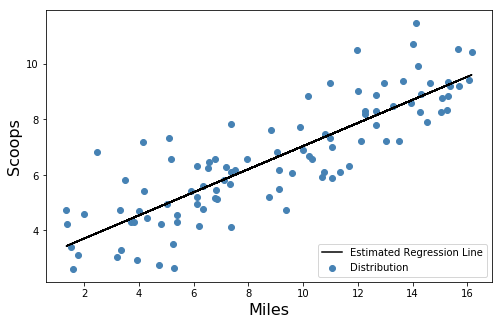

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(dfTreats["miles"], dfTreats["scoops"], color="steelblue")
ax.set_xlabel("Miles", fontsize=16)
ax.set_ylabel("Scoops", fontsize=16)
ax.plot(x, ahat + bhat*x, color="black")
ax.legend(['Estimated Regression Line','Distribution'],loc = 'lower right')

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

$\hat a$ tells us the minimum amount of ice cream eaten after a run is usually around 2.8. $\hat \beta$ tells us that about 0.4 more scoops of ice cream are eaten for every mile ran. Both the graph and regression model show that the relationship is positive.

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [18]:
print("The predicted ice cream consumption after a marathon run based on the model is {:.4f} scoops".format(ahat+(bhat*26.2)))

The predicted ice cream consumption after a marathon run based on the model is 13.7674 scoops


The amount of ice cream that can be consumed has a limit and that limit may differ from the limit on running distance. 13 scoops of ice cream is a lot even if you just ran a marathon. If he ran more he would just be eating more and more ice cream which is unrealistic and a clear drawback to this model.

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

In [19]:
crit = stats.t.ppf(1-(.44/2),len(x)-2)
me = crit * stderr
print("Therefore, the 66% confidence interval for this sample is {:.3f}".format(bhat),chr(177),"{:.3f} which is [{:.3f}, {:.3f}].".format(me,bhat-me,bhat+me))

Therefore, the 66% confidence interval for this sample is 0.416 ± 0.020 which is [0.395, 0.436].


**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

The amount of scoops could also depend on things like the amount of other food consumed that day, other physical training done that day, or even the available ice cream flavors.